# 线性回归从零实现

In [4]:
from mxnet import ndarray as nd
import matplotlib.pyplot as plt
import numpy as np
import time

In [5]:
num_inputs = 2
num_examples = 1000
w = [2,-3.4]
b = 4.2

x = nd.random.normal(scale=1,shape=(num_examples,num_inputs))
y = nd.dot(x,nd.array(w).T) + b
y += nd.random.normal(scale=0.01,shape=y.shape)
print(y.shape)

(1000,)


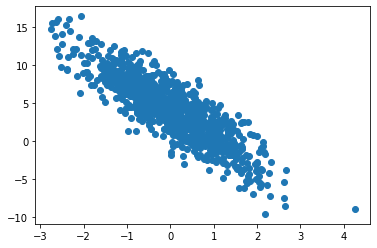

In [6]:
plt.scatter(x[:,1].asnumpy(),y.asnumpy())
plt.show()

In [7]:
class LinearRegressor:
    def __init__(self,input_shape,output_shape):
        self.input_shape = input_shape
        self.output_shape = output_shape
        self.weight = nd.random.normal(scale=0.01,shape=(input_shape,1))
        self.bias = nd.zeros(shape=(1))

    def fit(self,x,y,learning_rate,epoches,batch_size):
        start = time.time()
        for epoch in range(epoches):
            for batch_data in self.batches(x,y,batch_size):
                x_batch,y_batch = batch_data[0],batch_data[1]
                y_hat = self.forward(x_batch)
                loss = self.mse(y_batch,y_hat)
                error = y_hat - y_batch.reshape(y_hat.shape)
                self.optimizer(x_batch,error,learning_rate)
            print('epoch:{},loss:{:.4f}'.format(epoch+1,self.mse(y,self.forward(x)).asscalar()))
        print('weight:',self.weight)
        print('bias:',self.bias)
        print('time interval:{:.2f}'.format(time.time() - start))
        
    def forward(self,x):
        return nd.dot(x,self.weight) + self.bias
    
    def mse(self,y,y_hat):
        m = len(y)
        mean_square = nd.sum((y - y_hat.reshape(y.shape)) ** 2) / (2 * m)
        return mean_square
    
    def optimizer(self,x,error,learning_rate):
        gradient = 1/len(x) * nd.dot(x.T,error)
        self.weight = self.weight - learning_rate * gradient
        self.bias = self.bias - learning_rate * error[0]
        
    def batches(self,x,y,batch_size):
        nSamples = len(x)
        nBatches = nSamples // batch_size 
        indexes = np.random.permutation(nSamples)
        for i in range(nBatches):
            yield (x[indexes[i*batch_size:(i+1)*batch_size]], y[indexes[i*batch_size:(i+1)*batch_size]])
        

In [8]:
lr = LinearRegressor(input_shape=2,output_shape=1)
lr.fit(x,y,learning_rate=0.1,epoches=20,batch_size=200)

epoch:1,loss:5.7996
epoch:2,loss:2.1903
epoch:3,loss:0.9078
epoch:4,loss:0.3178
epoch:5,loss:0.0795
epoch:6,loss:0.0204
epoch:7,loss:0.0156
epoch:8,loss:0.0068
epoch:9,loss:0.0022
epoch:10,loss:0.0009
epoch:11,loss:0.0003
epoch:12,loss:0.0001
epoch:13,loss:0.0001
epoch:14,loss:0.0001
epoch:15,loss:0.0000
epoch:16,loss:0.0000
epoch:17,loss:0.0000
epoch:18,loss:0.0001
epoch:19,loss:0.0001
epoch:20,loss:0.0001
weight: 
[[ 1.999662]
 [-3.400079]]
<NDArray 2x1 @cpu(0)>
bias: 
[4.2030163]
<NDArray 1 @cpu(0)>
time interval:0.22


# 线性回归简洁实现

In [98]:
from mxnet import gluon
from mxnet.gluon import loss as gloss
from mxnet.gluon import data as gdata
from mxnet.gluon import nn
from mxnet import init,autograd

# 定义模型
net = nn.Sequential()
net.add(nn.Dense(1))

# 初始化模型参数
net.initialize(init.Normal(sigma=0.01))

# 定义损失函数
loss = gloss.L2Loss()

# 定义优化算法
optimizer = gluon.Trainer(net.collect_params(), 'sgd',{'learning_rate':0.1})

epoches = 20
batch_size = 200

# 获取批量数据
dataset = gdata.ArrayDataset(x,y)
data_iter = gdata.DataLoader(dataset,batch_size,shuffle=True)

# 训练模型
start = time.time()
for epoch in range(epoches):
    for batch_x,batch_y in data_iter:
        with autograd.record():
            l = loss(net(batch_x),batch_y)
        l.backward()
        optimizer.step(batch_size)
    l = loss(net(x),y)
    print('epoch:{},loss:{:.4f}'.format(epoch+1,l.mean().asscalar()))
print('weight:',net[0].weight.data())
print('weight:',net[0].bias.data())
print('time interval:{:.2f}'.format(time.time() - start))

epoch:1,loss:5.7794
epoch:2,loss:1.9934
epoch:3,loss:0.6884
epoch:4,loss:0.2381
epoch:5,loss:0.0825
epoch:6,loss:0.0286
epoch:7,loss:0.0100
epoch:8,loss:0.0035
epoch:9,loss:0.0012
epoch:10,loss:0.0005
epoch:11,loss:0.0002
epoch:12,loss:0.0001
epoch:13,loss:0.0001
epoch:14,loss:0.0001
epoch:15,loss:0.0001
epoch:16,loss:0.0000
epoch:17,loss:0.0000
epoch:18,loss:0.0000
epoch:19,loss:0.0000
epoch:20,loss:0.0000
weight: 
[[ 1.9996439 -3.400059 ]]
<NDArray 1x2 @cpu(0)>
weight: 
[4.2002025]
<NDArray 1 @cpu(0)>
time interval:0.86


# 附:mxnet中的损失函数核初始化方法

- 损失函数

__all__ = ['Loss', 'L2Loss', 'L1Loss',
           'SigmoidBinaryCrossEntropyLoss', 'SigmoidBCELoss',
           'SoftmaxCrossEntropyLoss', 'SoftmaxCELoss',
           'KLDivLoss', 'CTCLoss', 'HuberLoss', 'HingeLoss',
           'SquaredHingeLoss', 'LogisticLoss', 'TripletLoss', 'PoissonNLLLoss', 'CosineEmbeddingLoss']

- 初始化方法

['Zero', 'One', 'Constant', 'Uniform', 'Normal', 'Orthogonal','Xavier','MSRAPrelu','Bilinear','LSTMBias','DusedRNN']